In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import sklearn as sk
from sklearn.model_selection import train_test_split
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5 
#KNN - это непараметрический, ленивый алгоритм обучения
#Что делает kNN? kNN не строит никакую классификационную модель. Вместо этого он просто сохраняет размеченные тренировочные данные.

In [32]:
inf1 = pd.read_excel('File-1. Flights+Roster.xlsx', index_col = 0)

In [33]:
inf1.head()

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,3843f606-f1bb-4a3d-ab63-b46abcf5889d,ALA,CP,M,FlightDeck,622,2019-06-01,0,245705753672,,...,01:01:00,61,2019-06-01,02:40:00,160,02:48:00,168,P4-KEA,763,763
14396,9d758871-6f43-4d6e-b480-f84d78aa3d8a,ALA,FO,M,FlightDeck,622,2019-06-01,0,245705753672,,...,01:01:00,61,2019-06-01,02:40:00,160,02:48:00,168,P4-KEA,763,763
14396,3d1785a4-7c68-44eb-9630-db786d59d748,ALA,PU,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,e69d580d-8cd4-4c25-aefd-282175a8f0e3,ALA,IS,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,34efa49d-a4ab-4df9-8c93-30a996d9db82,ALA,FY,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763


In [34]:
df['Base'].head()

NameError: name 'df' is not defined

In [ ]:
baseA = inf1[inf1['Base']=='ALA ']

baseT = inf1[inf1['Base']=='TSE ']
baseT
baseA
#можно разделить
#1. Разделить всех по базам (Base)


In [42]:
df['Fleet'].unique()

array([763, 752, 321, 320, 'LCC ', 'E90 ', 'E2  ', nan, '321L'],
      dtype=object)

In [36]:
inf1 = pd.DataFrame()

In [63]:
AirbusALA = baseA[(baseA['Fleet'] == 320 ) | (baseA['Fleet']== 321 ) | (baseA['Fleet']== '321L ' ) | (baseA['Fleet']== 319 )] 

In [64]:
AirbusALA

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,8cfb75f4-e9bc-4bf2-ba66-153d91dad70d,ALA,CP,M,FlightDeck,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,b0f48d03-a246-4f44-909f-55f10f7ec702,ALA,FO,M,FlightDeck,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,fccb0c9a-ad80-4d65-93df-dc32a55fd157,ALA,PU,M,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,b12732b1-8395-4e0b-985a-da5c9fcd0705,ALA,IS,F,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,d82029ed-c045-4231-9ec5-45c8bcba8eb5,ALA,FY,F,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,f62a04f6-1662-4edc-9546-817eefcb8bf3,ALA,FY,F,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,b1e366fe-c8fd-40a2-a7a2-7d1008aa1eb7,ALA,FY,F,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,0ffdbef4-ce6e-4a46-97ee-ff853faf1708,ALA,FJ,F,CabinCrew,560,2019-06-01,0,245638579272,,...,10:39:00,639,2019-06-01,16:05:00,965,16:13:00,973,P4-KDE,321,321
14396,6f441297-e625-4ed4-b7d8-a1657000eb46,ALA,CP,M,FlightDeck,912,2019-06-01,0,137979508787,,...,18:59:00,1139,2019-06-02,00:05:00,1445,00:18:00,1458,P4-KDA,321,321


In [65]:
BoiengALA = baseA [(baseA['Fleet'] == 752) | (baseA['Fleet']==763)]
BoiengALA

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,3843f606-f1bb-4a3d-ab63-b46abcf5889d,ALA,CP,M,FlightDeck,622,2019-06-01,0,245705753672,,...,01:01:00,61,2019-06-01,02:40:00,160,02:48:00,168,P4-KEA,763,763
14396,9d758871-6f43-4d6e-b480-f84d78aa3d8a,ALA,FO,M,FlightDeck,622,2019-06-01,0,245705753672,,...,01:01:00,61,2019-06-01,02:40:00,160,02:48:00,168,P4-KEA,763,763
14396,3d1785a4-7c68-44eb-9630-db786d59d748,ALA,PU,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,e69d580d-8cd4-4c25-aefd-282175a8f0e3,ALA,IS,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,34efa49d-a4ab-4df9-8c93-30a996d9db82,ALA,FY,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,d69298ef-0ebf-45af-a811-275561689484,ALA,FY,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,0a6a6dd7-73ab-4550-8978-71811a971a1a,ALA,FJ,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,b2698f11-3eb0-4210-9123-6d651c570684,ALA,FJ,F,CabinCrew,910,2019-06-01,0,137979572530,,...,02:30:00,150,2019-06-01,09:20:00,560,09:24:00,564,P4-KEC,763,763
14396,fe3a574d-6165-41fc-bb15-584932b5298d,ALA,CP,M,FlightDeck,916,2019-06-01,0,137979572533,,...,10:35:00,635,2019-06-01,15:45:00,945,15:42:00,942,P4-MAS,752,752


In [66]:
EmbraerALA = baseA [(baseA['Fleet'] == 'E90 ')]
EmbraerALA

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,09ff7a95-b838-4f38-98cd-9c15a0065837,ALA,CP,M,FlightDeck,141,2019-06-01,0,137979049009,,...,06:17:00,377,2019-06-01,10:45:00,645,10:23:00,623,P4-KCH,E90,E90
14396,09ff7a95-b838-4f38-98cd-9c15a0065837,ALA,CP,M,FlightDeck,142,2019-06-01,0,137979049009,,...,11:43:00,703,2019-06-01,15:20:00,920,15:30:00,930,P4-KCH,E90,E90
14396,3fe6af94-87e5-4bd3-bf8f-f7601f3eff8f,ALA,FO,M,FlightDeck,141,2019-06-01,0,137979049009,,...,06:17:00,377,2019-06-01,10:45:00,645,10:23:00,623,P4-KCH,E90,E90
14396,3fe6af94-87e5-4bd3-bf8f-f7601f3eff8f,ALA,FO,M,FlightDeck,142,2019-06-01,0,137979049009,,...,11:43:00,703,2019-06-01,15:20:00,920,15:30:00,930,P4-KCH,E90,E90
14396,ac2f3bea-b68e-4c70-82b0-e11b5558e9fb,ALA,PU,F,CabinCrew,141,2019-06-01,0,137979049009,,...,06:17:00,377,2019-06-01,10:45:00,645,10:23:00,623,P4-KCH,E90,E90
14396,ac2f3bea-b68e-4c70-82b0-e11b5558e9fb,ALA,PU,F,CabinCrew,142,2019-06-01,0,137979049009,,...,11:43:00,703,2019-06-01,15:20:00,920,15:30:00,930,P4-KCH,E90,E90
14396,8c1cff3d-50a0-4c02-8553-a0fb501b1304,ALA,IS,F,CabinCrew,141,2019-06-01,0,137979049009,,...,06:17:00,377,2019-06-01,10:45:00,645,10:23:00,623,P4-KCH,E90,E90
14396,8c1cff3d-50a0-4c02-8553-a0fb501b1304,ALA,IS,F,CabinCrew,142,2019-06-01,0,137979049009,,...,11:43:00,703,2019-06-01,15:20:00,920,15:30:00,930,P4-KCH,E90,E90
14396,62611629-051e-4d38-829d-c277123dbf22,ALA,FJ,F,CabinCrew,141,2019-06-01,0,137979049009,,...,06:17:00,377,2019-06-01,10:45:00,645,10:23:00,623,P4-KCH,E90,E90


In [67]:
AirbusTSE = baseT[(baseT['Fleet'] == 320 ) | (baseT['Fleet']== 321 ) | (baseT['Fleet']== '321L ' ) | (baseT['Fleet']== 319 )] 
AirbusTSE

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,8ec9cebd-888b-4634-945a-9c32de3972a2,TSE,CP,M,FlightDeck,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,f92b5b43-b606-42f1-b1a9-42c3982215dd,TSE,FO,M,FlightDeck,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,f5dbf2f6-d3e9-40bc-9edb-ef696c4dbb9c,TSE,PU,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,56c75ccf-a3ad-4810-bd54-a5b2051c7b07,TSE,IS,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,60fc005f-c7bb-4d21-b8dc-5daff0326b03,TSE,FY,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,05f46603-1e5e-4153-832c-6c73f2573007,TSE,FY,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,95f2b6f7-9002-4fd2-973e-b77e4a6372a7,TSE,FY,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,669af9be-8e9e-4025-b570-b67dacee0d98,TSE,FJ,F,CabinCrew,228,2019-06-01,0,137979114039,,...,18:55:00,1135,2019-06-02,00:50:00,1490,01:05:00,1505,P4-KBG,320,320
14396,fce79a24-7055-4c36-be47-04291963a8a4,TSE,CP,M,FlightDeck,918,2019-06-01,0,137979572535,,...,19:10:00,1150,2019-06-01,23:55:00,1435,23:43:00,1423,P4-KBE,320,320


In [68]:
BoiengTSE = baseT [(baseT['Fleet'] == 752) | (baseT['Fleet']==763)]
BoiengTSE

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,1761e909-8976-4bda-ac9f-375961bba972,TSE,PU,M,CabinCrew,995,2019-06-01,0,245756085320,,...,11:45:00,705,2019-06-01,13:35:00,815,13:28:00,808,P4-KEC,763,763
14396,5580d2c8-a68d-4014-88ca-fc8ce75148c7,TSE,IS,F,CabinCrew,995,2019-06-01,0,245756085320,,...,11:45:00,705,2019-06-01,13:35:00,815,13:28:00,808,P4-KEC,763,763
14396,f42148ab-e746-4542-bb3f-0ee063671b75,TSE,FY,F,CabinCrew,995,2019-06-01,0,245756085320,,...,11:45:00,705,2019-06-01,13:35:00,815,13:28:00,808,P4-KEC,763,763
14396,5176698d-9477-4aa3-9632-c85331462340,TSE,IS,F,CabinCrew,942,2019-06-01,0,137979573300,,...,17:00:00,1020,2019-06-01,23:30:00,1410,23:14:00,1394,P4-EAS,752,752
14396,c7a85019-ffe6-47d4-a1ff-c775d34499d0,TSE,FY,F,CabinCrew,942,2019-06-01,0,137979573300,,...,17:00:00,1020,2019-06-01,23:30:00,1410,23:14:00,1394,P4-EAS,752,752
14396,fc9f7e36-6f93-41a7-b1a5-462bbd1866d4,TSE,FY,F,CabinCrew,942,2019-06-01,0,137979573300,,...,17:00:00,1020,2019-06-01,23:30:00,1410,23:14:00,1394,P4-EAS,752,752
14396,62483089-e03a-4713-8915-0e907b887b42,TSE,FJ,F,CabinCrew,942,2019-06-01,0,137979573300,,...,17:00:00,1020,2019-06-01,23:30:00,1410,23:14:00,1394,P4-EAS,752,752
14396,b833508e-b153-4bd6-b223-ad16e27418b9,TSE,PU,F,CabinCrew,922,2019-06-01,0,137979572785,,...,17:54:00,1074,2019-06-01,23:45:00,1425,23:29:00,1409,P4-KEA,763,763
14396,ea8b64ad-ea98-465f-9ea9-0e14984de163,TSE,IS,M,CabinCrew,922,2019-06-01,0,137979572785,,...,17:54:00,1074,2019-06-01,23:45:00,1425,23:29:00,1409,P4-KEA,763,763


In [69]:
EmbraerTSE = baseT [(baseT['Fleet'] == 'E90 ')]
EmbraerTSE

,CrewMemberID,Base,Position,Gender,CrewType,FlightNo,FlightDate,Cancelled,DutyNo,FlightPostfix,...,ActualDepartureTime,ATD,ScheduledArrivalDate,ScheduledArrivalTime,STA,ActualArrivalTime,ATA,TailNumber,Fleet,AcType
Day,,,,,,,,,,,,,,,,,,,,,
14396,a4f78377-c99b-4c33-b760-cdd1894c6e9a,TSE,CP,M,FlightDeck,114,2019-06-01,0,137979048243,,...,19:34:00,1174,2019-06-01,22:50:00,1370,22:41:00,1361,P4-KCG,E90,E90
14396,a4f78377-c99b-4c33-b760-cdd1894c6e9a,TSE,CP,M,FlightDeck,113,2019-06-01,0,137979048243,,...,15:21:00,921,2019-06-01,18:50:00,1130,18:21:00,1101,P4-KCG,E90,E90
14396,ffd17d18-4b3b-488e-abe7-003c96cbcf90,TSE,FO,M,FlightDeck,114,2019-06-01,0,137979048243,,...,19:34:00,1174,2019-06-01,22:50:00,1370,22:41:00,1361,P4-KCG,E90,E90
14396,ffd17d18-4b3b-488e-abe7-003c96cbcf90,TSE,FO,M,FlightDeck,113,2019-06-01,0,137979048243,,...,15:21:00,921,2019-06-01,18:50:00,1130,18:21:00,1101,P4-KCG,E90,E90
14396,4fa524c4-5642-4d7c-8f81-549d5640c3ed,TSE,PU,F,CabinCrew,114,2019-06-01,0,137979048243,,...,19:34:00,1174,2019-06-01,22:50:00,1370,22:41:00,1361,P4-KCG,E90,E90
14396,4fa524c4-5642-4d7c-8f81-549d5640c3ed,TSE,PU,F,CabinCrew,113,2019-06-01,0,137979048243,,...,15:21:00,921,2019-06-01,18:50:00,1130,18:21:00,1101,P4-KCG,E90,E90
14396,ffa7e732-8352-4c91-8b36-3ff1147b4c22,TSE,IS,F,CabinCrew,114,2019-06-01,0,137979048243,,...,19:34:00,1174,2019-06-01,22:50:00,1370,22:41:00,1361,P4-KCG,E90,E90
14396,ffa7e732-8352-4c91-8b36-3ff1147b4c22,TSE,IS,F,CabinCrew,113,2019-06-01,0,137979048243,,...,15:21:00,921,2019-06-01,18:50:00,1130,18:21:00,1101,P4-KCG,E90,E90
14396,237760a0-8ef2-48a1-8565-17497ac859dd,TSE,FY,F,CabinCrew,114,2019-06-01,0,137979048243,,...,19:34:00,1174,2019-06-01,22:50:00,1370,22:41:00,1361,P4-KCG,E90,E90


In [71]:
inf2 = pd.read_excel('File-2. CrewCategory_Dictionary.xlsx', index_col = 0) #file2

In [72]:
inf2.head()

,CATEGORY_ID,CATEGORY_NAME,ACTIVE_FROM,ACTIVE_TILL
CrewMemberID,,,,
a509c666-48bc-4df6-b819-c17ec4bcde39,11,Pending Official English Retest,2013-04-17,2013-06-12
a509c666-48bc-4df6-b819-c17ec4bcde39,88,SEP annual history,1980-01-01,2015-03-31
a509c666-48bc-4df6-b819-c17ec4bcde39,6,No Passport (KZ Citizen),2015-06-11,2015-06-21
a509c666-48bc-4df6-b819-c17ec4bcde39,37,CAT 2,1980-01-01,2015-08-26
a509c666-48bc-4df6-b819-c17ec4bcde39,38,CAT 3A,1980-01-01,2015-08-26


In [ ]:
inf3 = pd.read_excel('File-3. Airports.xlsx', index_col = 0)

In [35]:
inf3.head()

,ICAO,COUNTRY,TERMINAL,PORTNAM,LONGITUD,LATITUDE
AIRPORT,,,,,,
1XJ,EGDX,EG,,ST ATHAN,W003260800,N51241700
AAL,EKYT,EK,,AALBORG,E009505699,N57053404
AAN,OMAL,OM,,AL AIN INTL,E055363300,N24154200
ABA,UNAA,U,,ABAKAN,E091230600,N53443000
ADB,LTBJ,LT,,"IZMIR,ADNAN MENDERES",E027091800,N38172100


In [36]:
inf3['COUNTRY'].value_counts()

K     33
U     31
UA    22
Z     20
EG    19
LT    11
ED    11
V     10
SB    10
OM     8
VT     7
LF     7
LP     6
LE     6
RK     6
OE     5
EH     5
HE     5
WM     4
OI     4
OP     4
LG     4
FA     3
VV     3
UK     3
EF     3
BI     3
UY     3
LI     3
EB     3
      ..
SV     1
GV     1
LB     1
OB     1
SY     1
Y      1
LK     1
TJ     1
LJ     1
OO     1
EE     1
FI     1
VD     1
UN     1
VR     1
VC     1
VY     1
HH     1
AM     1
SP     1
MM     1
OK     1
UM     1
LC     1
EY     1
OJ     1
VM     1
TN     1
LH     1
EV     1
Name: COUNTRY, Length: 82, dtype: int64

In [37]:
inf3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 1XJ  to SOC 
Data columns (total 6 columns):
ICAO        334 non-null object
COUNTRY     334 non-null object
TERMINAL    334 non-null object
PORTNAM     334 non-null object
LONGITUD    334 non-null object
LATITUDE    334 non-null object
dtypes: object(6)
memory usage: 18.3+ KB


In [38]:
from sklearn.preprocessing import StandardScaler ##  для скалирования данных
# чтобы все были в одинаковой шкале, например 100%

In [39]:
scaler = StandardScaler()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
inf3.describe()

,ICAO,COUNTRY,TERMINAL,PORTNAM,LONGITUD,LATITUDE
count,334,334,334,334,334,334
unique,324,82,11,329,328,328
top,,K,,,,N38530600
freq,6,33,310,4,3,3


In [45]:
inf3.columns

Index(['ICAO', 'COUNTRY', 'TERMINAL', 'PORTNAM', 'LONGITUD', 'LATITUDE'], dtype='object')

In [46]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


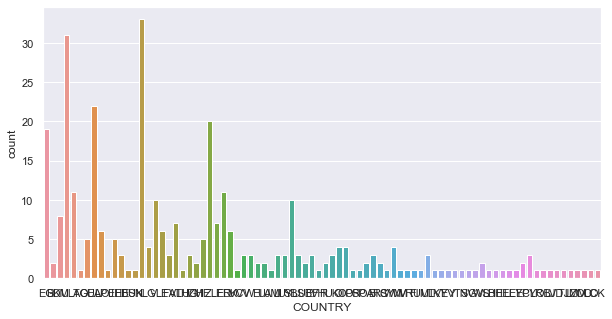

In [47]:
sns.set(style="darkgrid")
ax = sns.countplot(x='COUNTRY', data=inf3)
plt.show()

In [49]:
inf3 = inf3[inf3['PORTNAM'] == 'Part One']   #только serious crime 'UCR_PART' == 'Part One'
inf3.nunique()

,ICAO,COUNTRY,TERMINAL,PORTNAM,LONGITUD,LATITUDE
AIRPORT,,,,,,


In [50]:
inf33 =inf3.loc[:, ['ICAO', 'COUNTRY', 'TERMINAL', 'PORTNAM', 'LONGITUD', 'LATITUDE']]

In [56]:
s = inf33['LONGITUD'].value_counts(normalize=True)
s2 = pd.DataFrame(s)


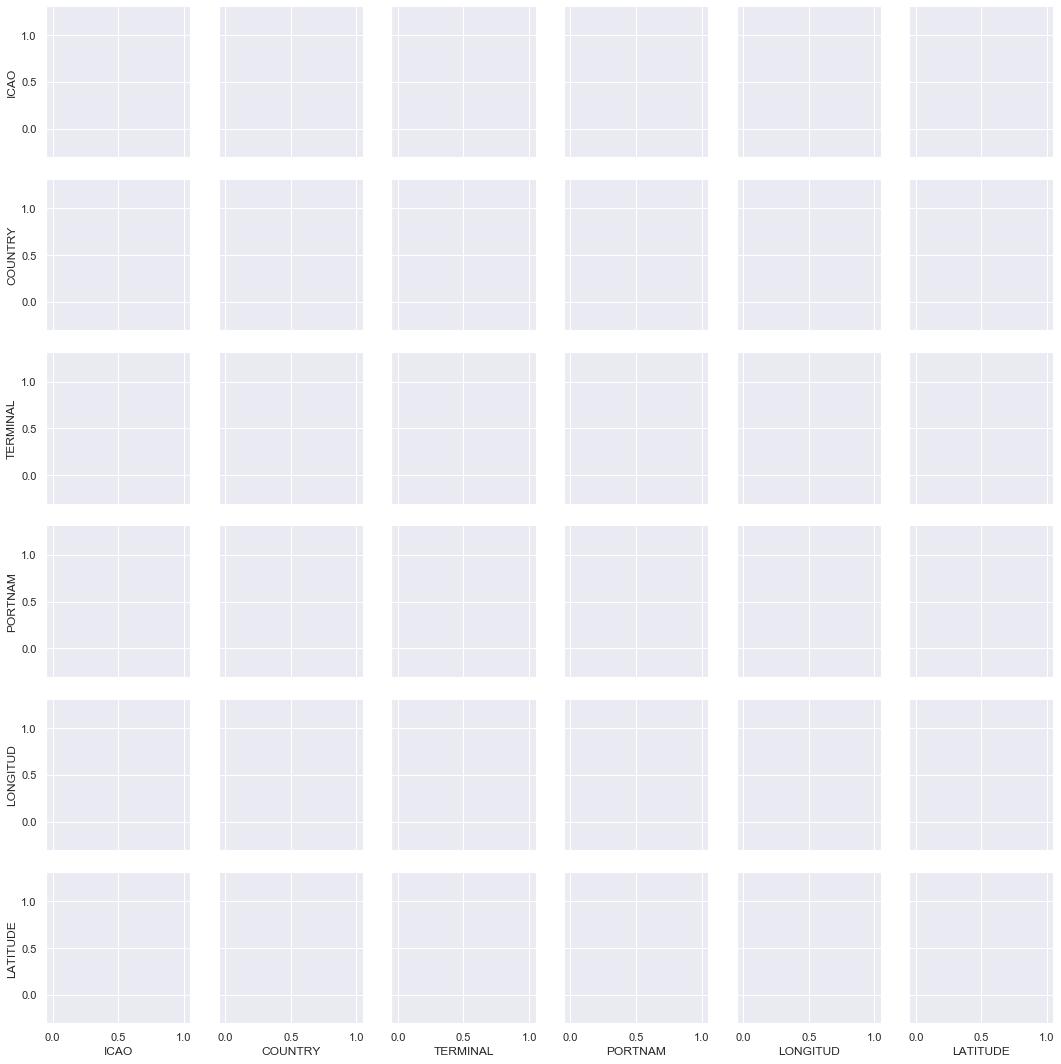

In [64]:
sns.pairplot(inf3)

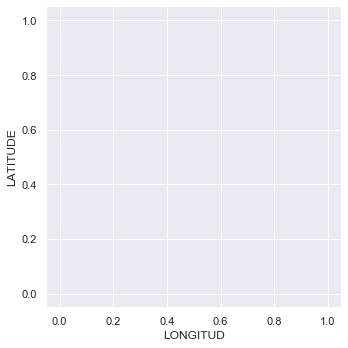

In [66]:
sns.lmplot(x='LONGITUD', y='LATITUDE', data=inf3) 